# Importing Libararies

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score



# Data Exploration

In [72]:
df =pd.read_csv(r"C:\Users\ASUS\Desktop\Titanic project\Titanic-Dataset.csv") 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
#df.head(3)
#df.tail(3)
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.275,D48,C
488,489,0,3,"Somerton, Mr. Francis William",male,30.0,0,0,A.5. 18509,8.050,NaN,S
53,54,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,2926,26.000,NaN,S


In [8]:
df.shape

(891, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

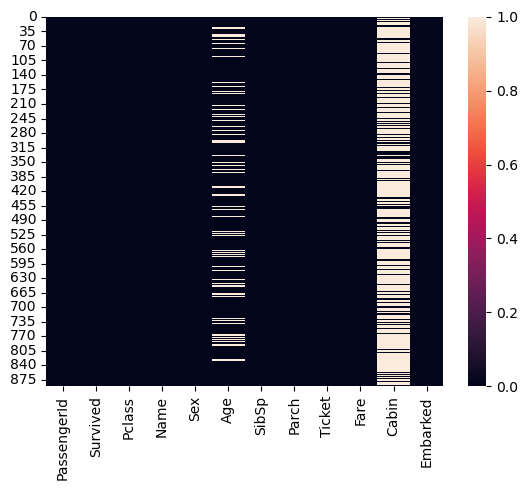

In [12]:
sns.heatmap(df.isnull())

# Data Cleaning 

In [38]:
df.drop(['Cabin','Ticket','Name','Embarked','Fare'],axis = 1, inplace=True)
df.Age = df.Age.fillna(df.Age.mean())
df.dropna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.000000,1,0
1,2,1,1,female,38.000000,1,0
2,3,1,3,female,26.000000,0,0
3,4,1,1,female,35.000000,1,0
4,5,0,3,male,35.000000,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0
887,888,1,1,female,19.000000,0,0
888,889,0,3,female,29.699118,1,2
889,890,1,1,male,26.000000,0,0


<Axes: >

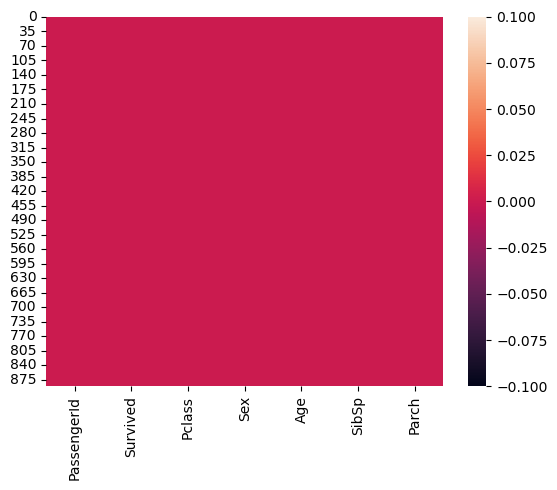

In [17]:
sns.heatmap(df.isnull())

# Data Analysis

In [94]:
x =df.drop('Survived', axis =1)
y=df['Survived']

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42,stratify=y)
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [105]:
print(f"Training features shape: {x_train.shape}")
print(f"Test features shape: {x_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")
# Combine back into complete datasets if needed
train = pd.concat([x_train, y_train], axis=1)
test = pd.concat([x_test, y_test], axis=1)

Training features shape: (712, 11)
Test features shape: (179, 11)
Training target shape: (712,)
Test target shape: (179,)


In [102]:
# Save the datasets
train.to_csv('titanic_train_split.csv', index=False)
test.to_csv('titanic_test_split.csv', index=False)

In [43]:
df1=df.drop(['Sex'],axis=1)

In [48]:
cor=df1.corr()
cor

,PassengerId,Survived,Pclass,Age,SibSp,Parch
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000


<Axes: >

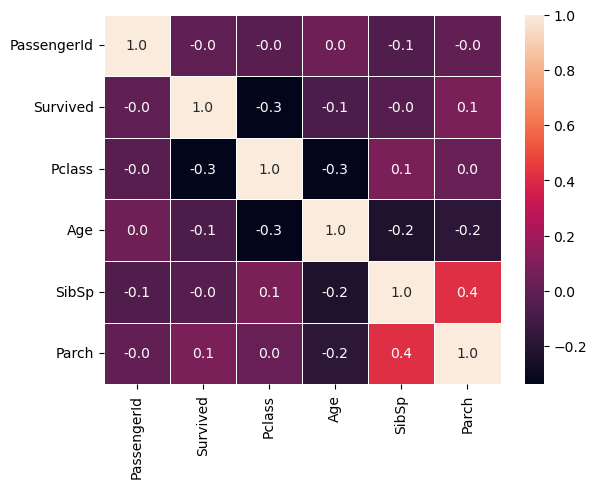

In [51]:
sns.heatmap(cor,annot=True,fmt='.1f',linewidth=0.5)

<Axes: ylabel='count'>

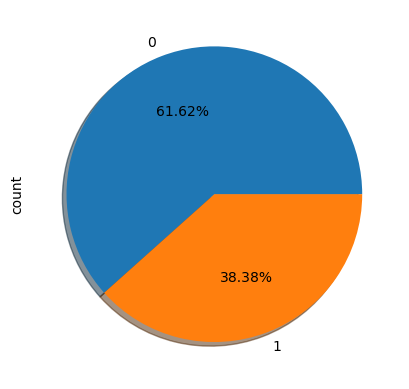

In [57]:
df.Survived.value_counts().plot.pie(autopct='%0.2f%%', shadow=True)

In [53]:
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Sex'>

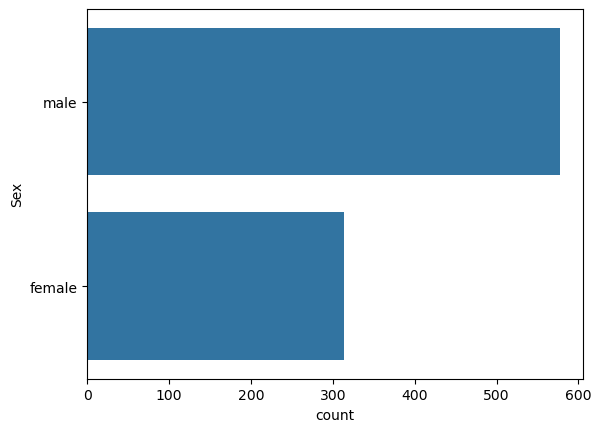

In [64]:
sns.countplot(df.Sex)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [99]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
#test_df.Sex= pd.get_dummies(test_df.Sex)

In [91]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Survived
709,710,3,male,29.699118,1,1,1
439,440,2,male,31.000000,0,0,0
840,841,3,male,20.000000,0,0,0
720,721,2,female,6.000000,0,1,1
39,40,3,female,14.000000,1,0,1
...,...,...,...,...,...,...,...
433,434,3,male,17.000000,0,0,0
773,774,3,male,29.699118,0,0,0
25,26,3,female,38.000000,1,5,1
84,85,2,female,17.000000,0,0,1


# Build Model

In [111]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
   
# Convert categorical variables to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19364\3023234026.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19364\3023234026.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [162]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [108]:
train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
692,693,3,"Lam, Mr. Ali",0,NaN,0,0,1601,56.4958,NaN,S,1
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",0,NaN,0,0,239854,0.0000,NaN,S,0
527,528,1,"Farthing, Mr. John",0,NaN,0,0,PC 17483,221.7792,C95,S,0
855,856,3,"Aks, Mrs. Sam (Leah Rosen)",1,18.0,0,1,392091,9.3500,NaN,S,1
801,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",1,31.0,1,1,C.A. 31921,26.2500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
359,360,3,"Mockler, Miss. Helen Mary ""Ellie""",1,NaN,0,0,330980,7.8792,NaN,Q,1
258,259,1,"Ward, Miss. Anna",1,35.0,0,0,PC 17755,512.3292,NaN,C,1
736,737,3,"Ford, Mrs. Edward (Margaret Ann Watson)",1,48.0,1,3,W./C. 6608,34.3750,NaN,S,0
462,463,1,"Gee, Mr. Arthur H",0,47.0,0,0,111320,38.5000,E63,S,0


In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [141]:
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Create and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


Training set: (712, 7)
Test set: (179, 7)


DecisionTreeClassifier(random_state=42)

In [150]:
y_pred = dt_model.predict(X_test)


In [151]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nDecision Tree Accuracy: {accuracy:.4f}")
#print("\nClassification Report:")
#print(classification_report(y_test, y_pred))
#print("\nConfusion Matrix:")
#print(confusion_matrix(y_test, y_pred))


Decision Tree Accuracy: 0.5810


In [144]:
accuracies =[]

In [145]:
def all(model):
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('accuracy =', accuracy)
    accuracies.append(accuracy)

In [152]:
model1=LogisticRegression()
all(model1)

accuracy = 0.5810055865921788


In [153]:
model2=RandomForestClassifier()
all(model2)


accuracy = 0.5810055865921788


In [154]:
model3=GradientBoostingClassifier()
all(model3)


accuracy = 0.5810055865921788


In [155]:
model4=DecisionTreeClassifier()
all(model4)

accuracy = 0.5810055865921788


In [156]:
model11=DecisionTreeClassifier(random_state=42)
all(model11)

accuracy = 0.5810055865921788


In [157]:
model11=LogisticRegression(random_state=42)
all(model11)

accuracy = 0.5810055865921788


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [164]:
Alghorithms=['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB']

In [165]:
Results=pd.DataFrame({'Alghorithms':Alghorithms,'accuracies':accuracies})

ValueError: All arrays must be of the same length